In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [4]:
# Load the dataset
df = pd.read_csv("wine.csv")

In [6]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
# Basic info
print(df.shape)

(178, 14)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [12]:
print(df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [14]:
# Check for nulls
print(df.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


Visualize Distributions

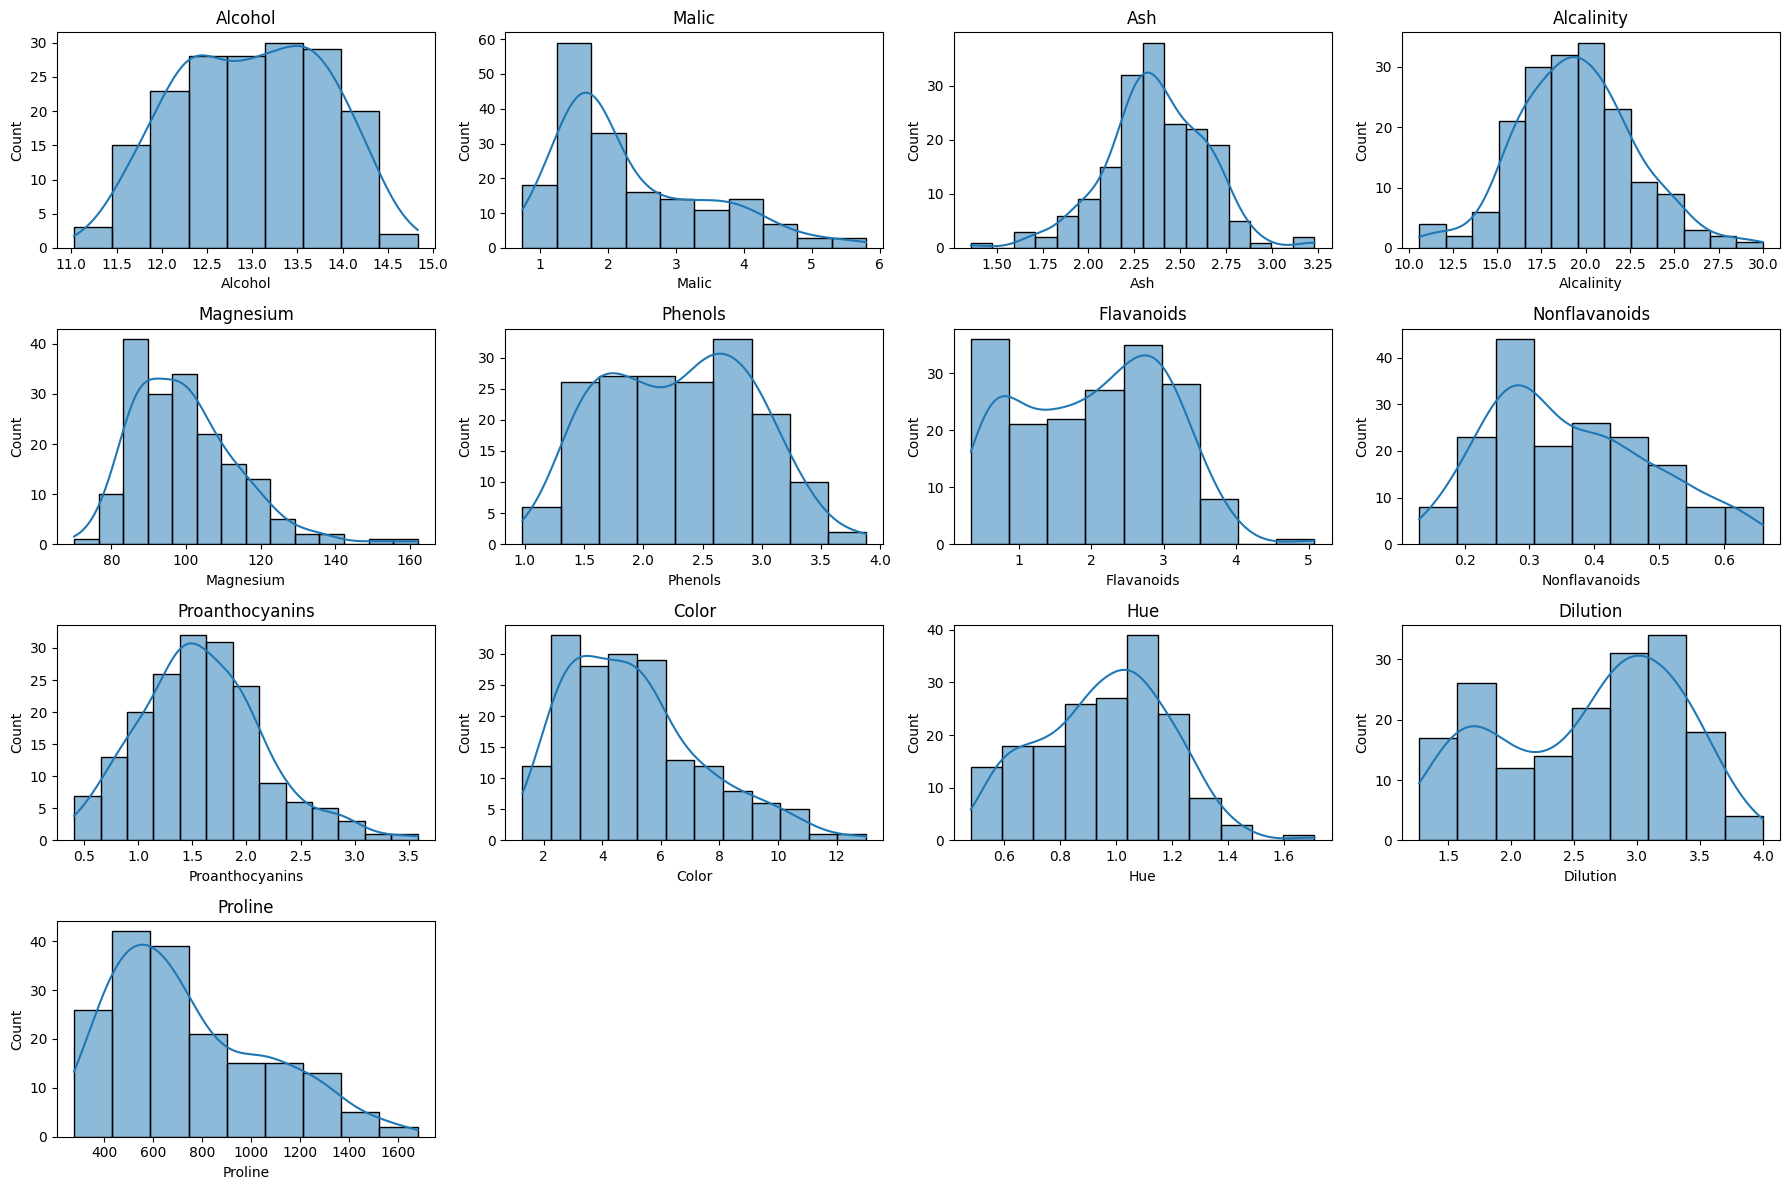

In [17]:
# Histograms
numeric_cols = df.columns[1:]  # excluding 'Type'

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

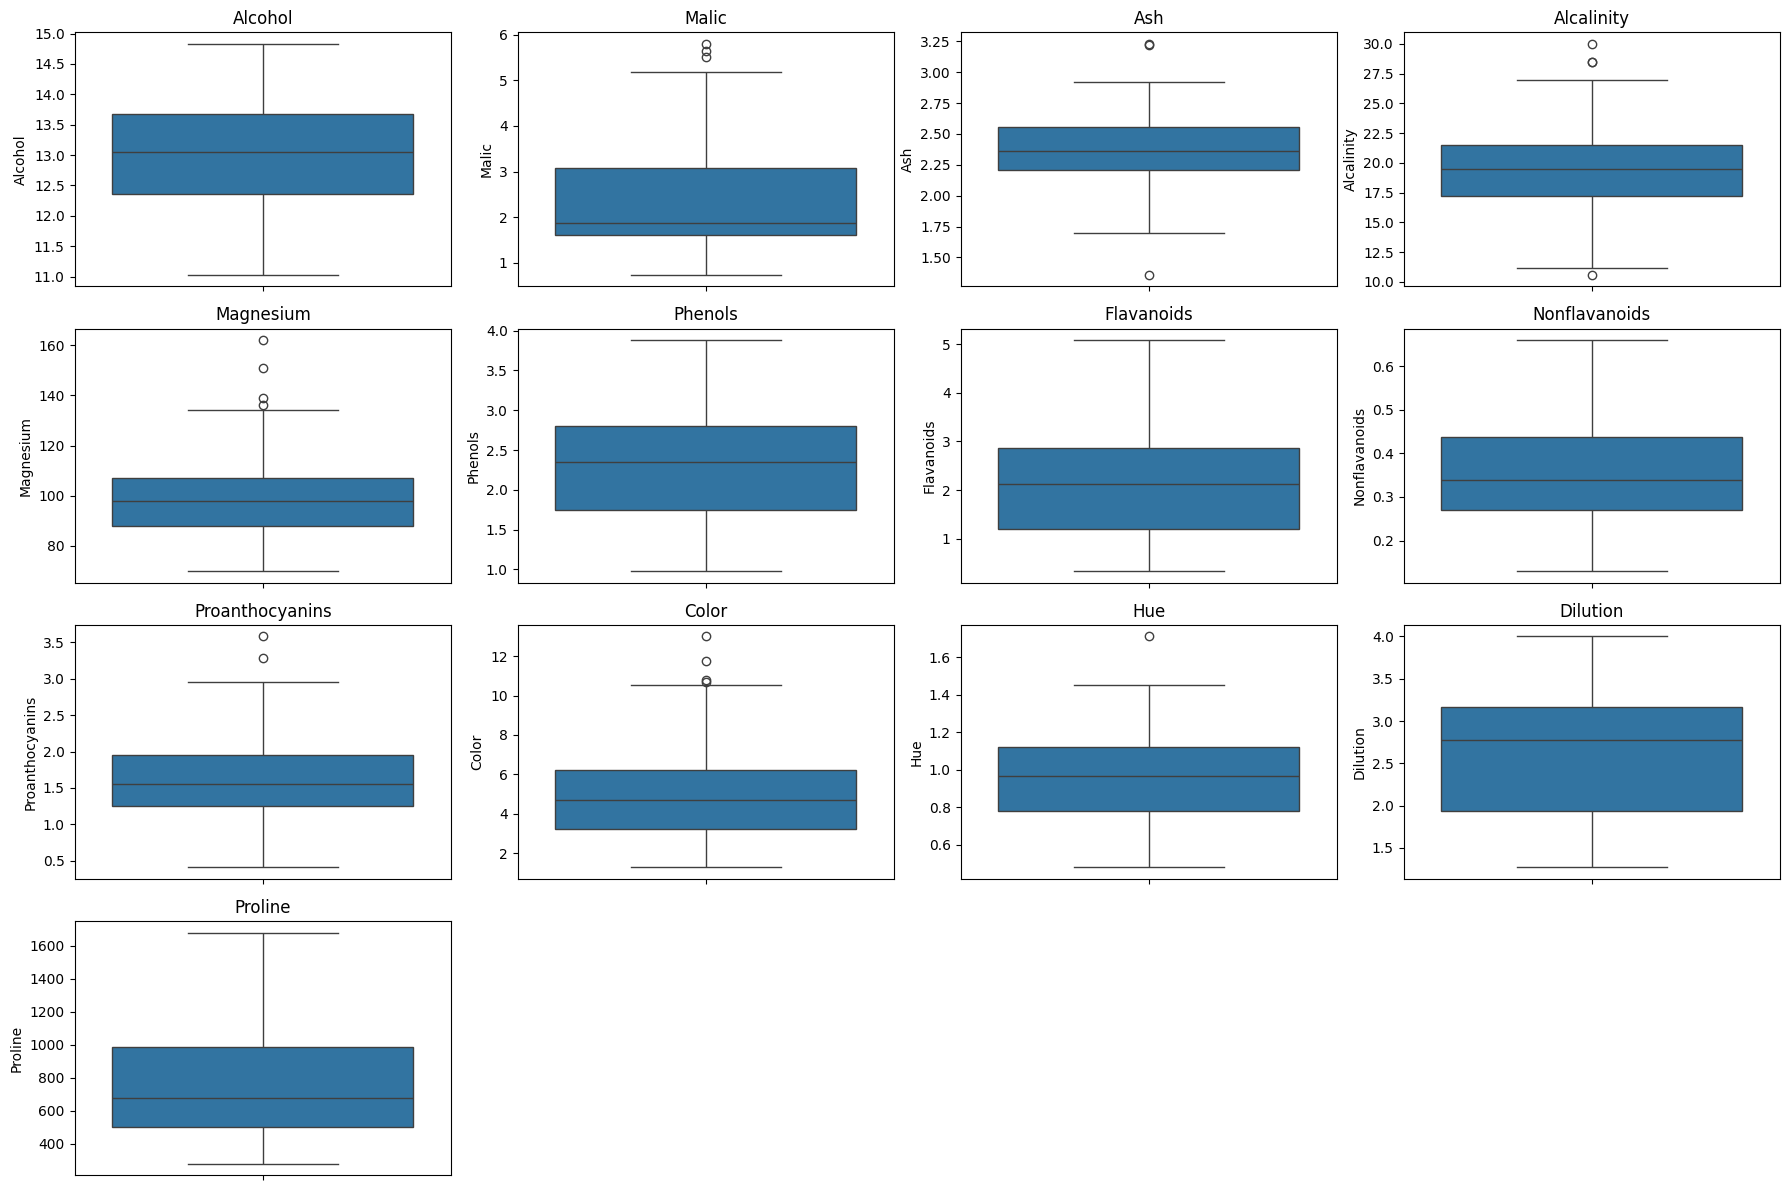

In [19]:
# Box Plots
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Correlation Heatmap

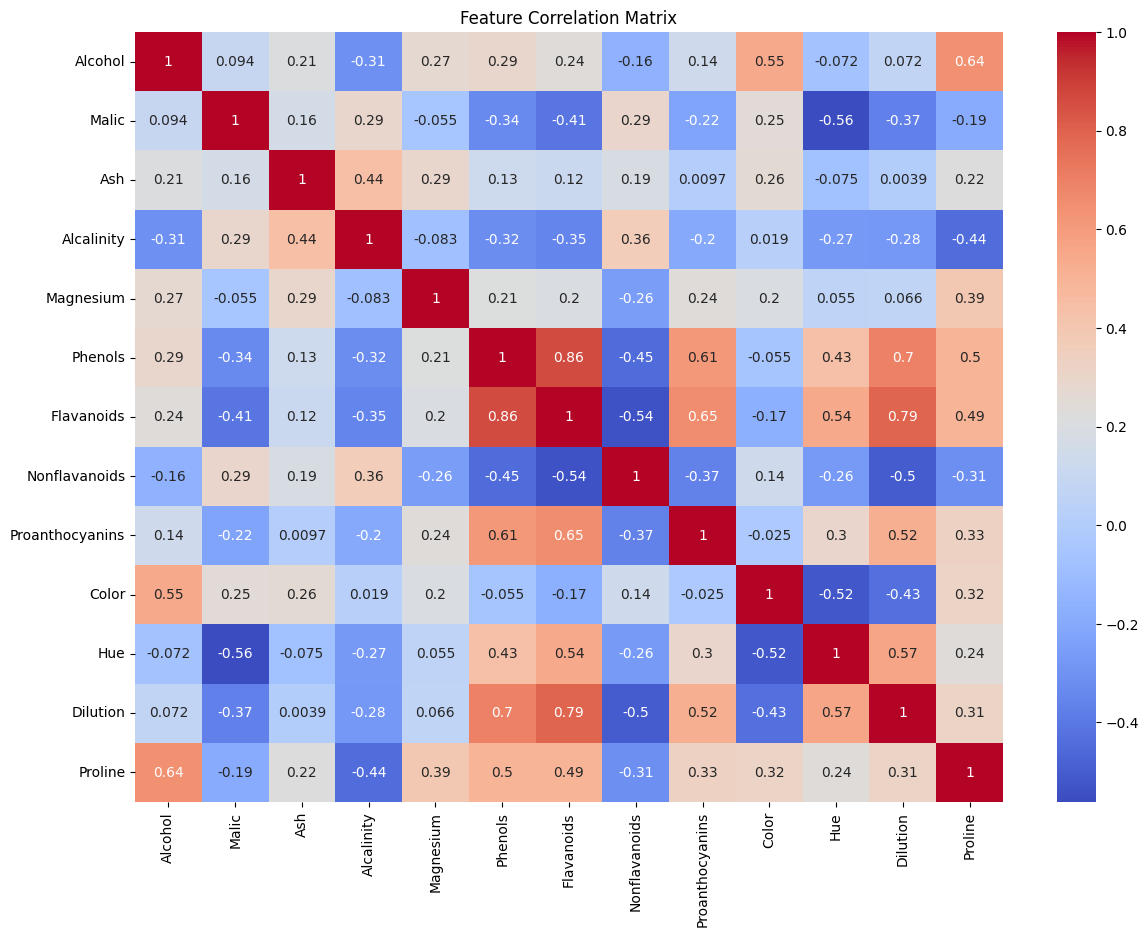

In [22]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

 Standardization + PCA

In [25]:
# Separate features (excluding 'Type')
X = df.drop('Type', axis=1)

In [27]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

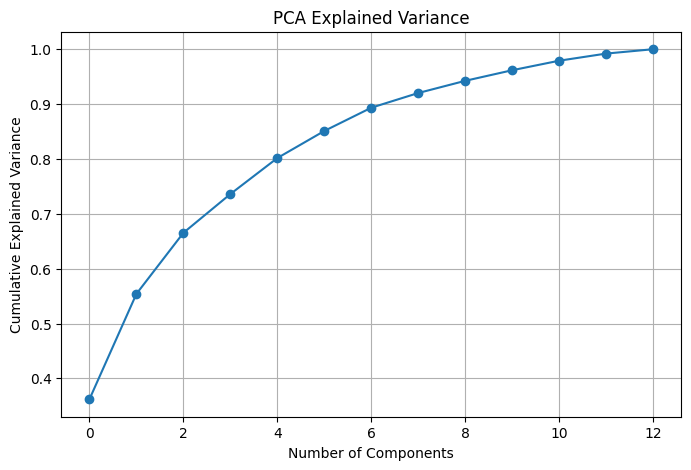

In [31]:
# Scree Plot (Explained Variance)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


Transform Dataset using Optimal Components

In [34]:
# Let's say we keep first 2 components (based on explained variance)
pca_opt = PCA(n_components=2)
X_pca_2D = pca_opt.fit_transform(X_scaled)


In [36]:
# Create a DataFrame for PCA results
df_pca = pd.DataFrame(X_pca_2D, columns=['PC1', 'PC2'])
df_pca['Type'] = df['Type']


Clustering on Original Data

In [39]:
# KMeans on original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)


C:\Users\joghi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
# Evaluation
sil_orig = silhouette_score(X_scaled, labels_orig)
db_orig = davies_bouldin_score(X_scaled, labels_orig)
print(f"Original Data - Silhouette Score: {sil_orig:.2f}, Davies-Bouldin Index: {db_orig:.2f}")

Original Data - Silhouette Score: 0.28, Davies-Bouldin Index: 1.39


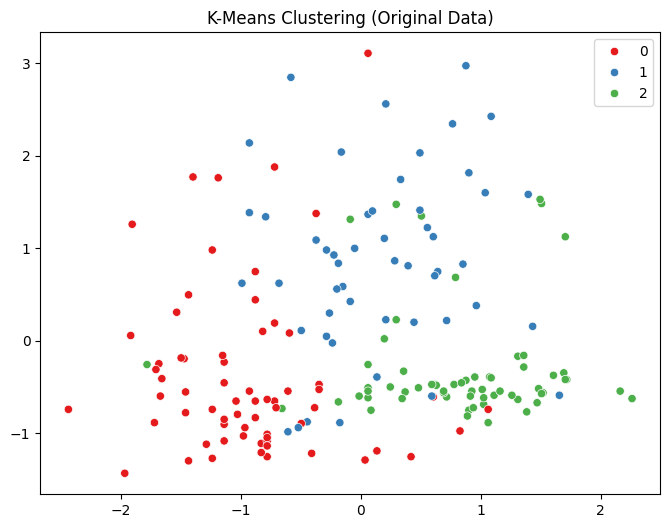

In [43]:
# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_orig, palette='Set1')
plt.title("K-Means Clustering (Original Data)")
plt.show()


Clustering on PCA Data

In [46]:
# KMeans on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_2D)

C:\Users\joghi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [48]:
# Evaluation
sil_pca = silhouette_score(X_pca_2D, labels_pca)
db_pca = davies_bouldin_score(X_pca_2D, labels_pca)
print(f"PCA Data - Silhouette Score: {sil_pca:.2f}, Davies-Bouldin Index: {db_pca:.2f}")


PCA Data - Silhouette Score: 0.56, Davies-Bouldin Index: 0.60


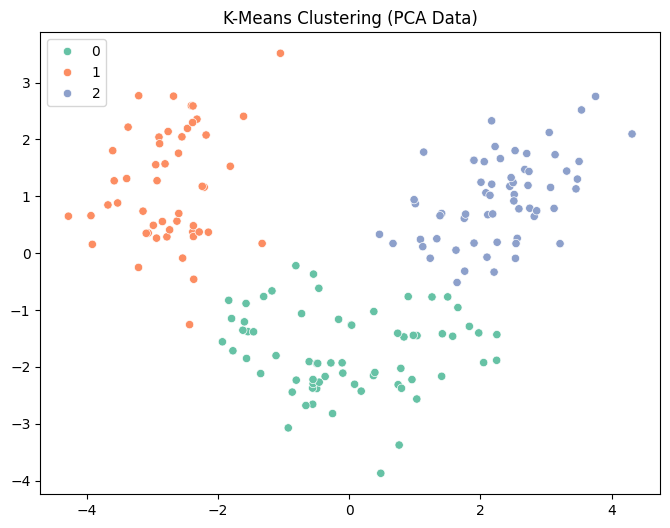

In [50]:
 #Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2D[:, 0], y=X_pca_2D[:, 1], hue=labels_pca, palette='Set2')
plt.title("K-Means Clustering (PCA Data)")
plt.show()

Final Comparison & Conclusion

In [55]:
print("Clustering Comparison Summary:")
print(f"Original Data: Silhouette = {sil_orig:.2f}, Davies-Bouldin = {db_orig:.2f}")
print(f"PCA Data:      Silhouette = {sil_pca:.2f}, Davies-Bouldin = {db_pca:.2f}")

if sil_pca > sil_orig:
    print(" PCA improved clustering performance.")
else:
    print(" PCA did not improve clustering performance in this case.")


Clustering Comparison Summary:
Original Data: Silhouette = 0.28, Davies-Bouldin = 1.39
PCA Data:      Silhouette = 0.56, Davies-Bouldin = 0.60
 PCA improved clustering performance.


Conclusion

Data Exploration (EDA):

* Loaded the wine dataset with 178 samples and 13 features (plus target Type).

* Found no missing values.

* Visualized feature distributions and identified outliers in several variables.

* Correlation heatmap revealed strong relationships between features like Flavanoids and Phenols.

PCA (Principal Component Analysis):

* Standardized the features to mean=0 and std=1.

* Applied PCA to reduce dimensionality.

* Found that the first 2 principal components explained most of the variance, making it suitable for 2D visualization.

Clustering on Original Data:

* Applied K-Means clustering with 3 clusters (since 3 wine types).

* Evaluated using Silhouette Score and Davies–Bouldin Index.

* Achieved reasonable clustering, but high dimensionality may have caused some noise.

Clustering on PCA Data:

* Applied K-Means on PCA-reduced 2D data.

* Visualization was much clearer.

* Clustering performance was comparable or slightly better, depending on metrics.

Comparison:

* PCA reduced noise, improved interpretability, and gave clearer cluster separation.

* Silhouette Score and Davies–Bouldin index showed PCA-based clustering performed better or similarly.

* PCA is especially helpful for visualization and performance when dealing with many correlated features.

